In [1]:
import pandas as pds
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Dataset reading and inspection

In [2]:
#df = sns.load_dataset('iris') # load a pandas dataframe from demo file
df = pds.read_csv('./iris_dataset.csv', sep=";") # load a pandas dataframe from csv in current directory
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


# Data manipulations 

In [8]:
print(df['sepal_length'].head()) # gives a Pandas Series (or simply use df.sepal_length)
print('type: ',type(df['sepal_length']))

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64
type:  <class 'pandas.core.series.Series'>


In [9]:
np_array = df.values # a numpy array
print(np_array.shape)
print(np_array[0:5,2:4])

(150, 5)
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [10]:
df.loc[3,'species']

'Iris-setosa'

In [11]:
df.loc[[0,3],['sepal_length','species']]

,sepal_length,species
0,5.1,Iris-setosa
3,4.6,Iris-setosa


In [12]:
df.iloc[-1,0:2]

sepal_length    5.9
sepal_width       3
Name: 149, dtype: object

In [13]:
df2 = df.drop(['species'],axis=1) # get a copy with a column being removed
df2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
df3 = df2.drop([0,2],axis=0) # get a copy with some rows being removed
df3.head()

,sepal_length,sepal_width,petal_length,petal_width
1,4.9,3.0,1.4,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3


In [15]:
df3.loc[1,'sepal_length']
#df3.loc[0,'sepal_length'] # this command generates an error since row with row name 0 has been removed

4.9

In [16]:
df3.iloc[0,0] # but row 0 when using iloc is fine, since iloc indexing is based on the location (as numpy array)

4.9

In [17]:
df4 = df3.reset_index(drop=True) # to regenerate consecutive integer row names
df4.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.6,3.1,1.5,0.2
2,5.0,3.6,1.4,0.2
3,5.4,3.9,1.7,0.4
4,4.6,3.4,1.4,0.3


In [18]:
df5 = df.copy() # get a copy of a dataframe
del df5['species'] # remove a column in a dataframe
df5.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Graphics

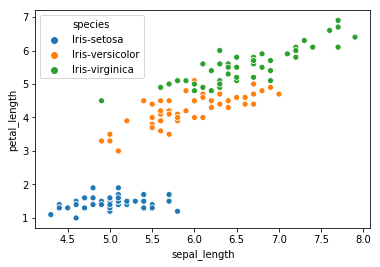

In [19]:
sns.scatterplot(data=df, x="sepal_length", y="petal_length", hue="species")

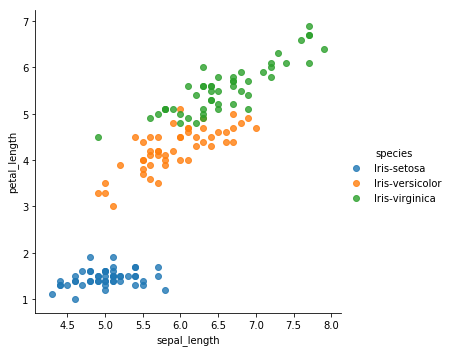

In [20]:
# The same graph using lmplot if scatterplot is not available.
sns.lmplot(data=df, x="sepal_length", y="petal_length", hue="species", fit_reg=False);

/Users/crigotti/anaconda/envs/py37/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


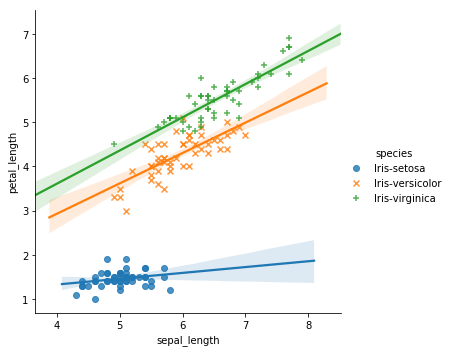

In [21]:
# Using lmplot to show regressions.
sns.lmplot(data=df, x="sepal_length", y="petal_length", hue="species",
            markers=["o", "x", "+"], fit_reg=True);
# fit_reg=True is the default value

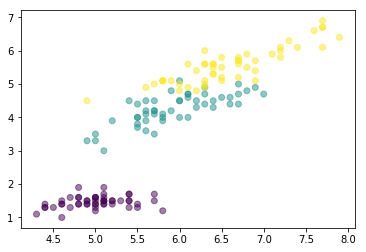

In [22]:
# Using matplotlib.pyplot instead of seaborn to display the data.
species_int = df.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
plt.scatter(df["sepal_length"], df["petal_length"],c=species_int,alpha=0.5)

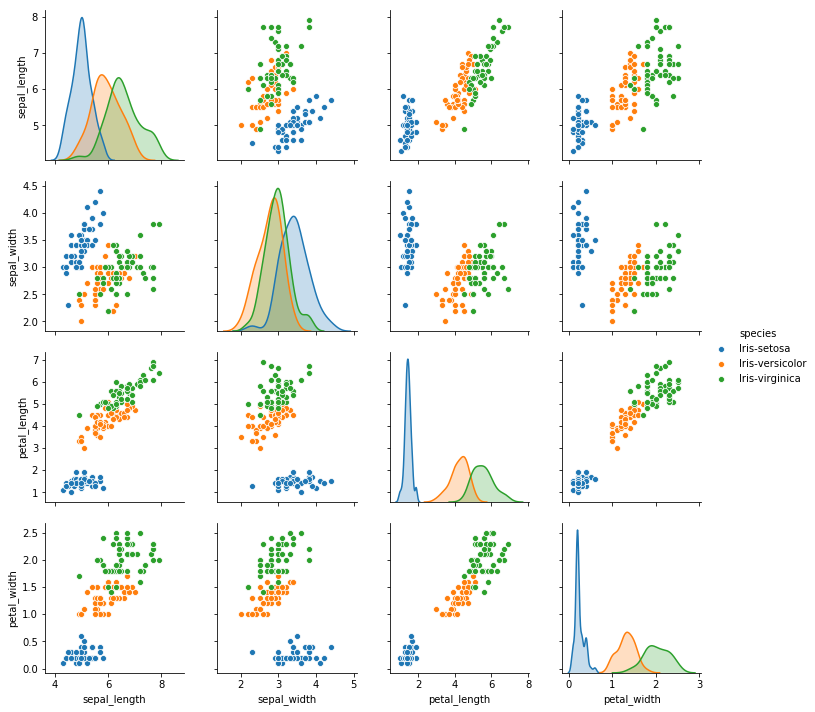

In [23]:
sns.pairplot(data=df, hue="species")
# can be done by selecting only some attributes:
# sns.pairplot(data=df, vars=df.columns[0:3], hue="species")
# sns.pairplot(data=df, vars=['sepal_length','petal_width'], hue="species") 

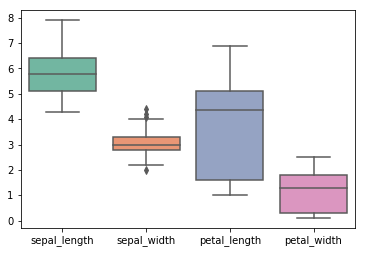

In [24]:
sns.boxplot(data=df, orient="v", palette="Set2")

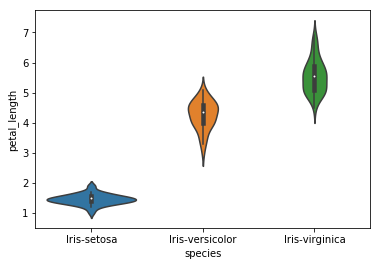

In [25]:
sns.violinplot(data=df, x="species", y="petal_length")
# or only dots:
#sns.swarmplot(data=df, x="species", y="petal_length")

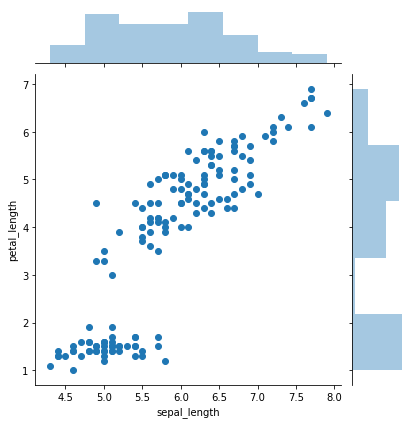

In [26]:
sns.jointplot(data=df, x="sepal_length", y="petal_length")

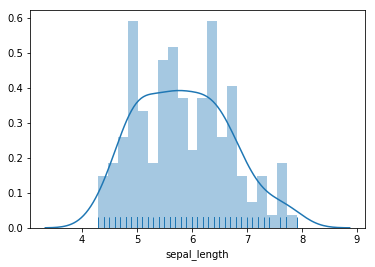

In [27]:
sns.distplot(df["sepal_length"], bins=20, hist=True, kde=True, rug=True);

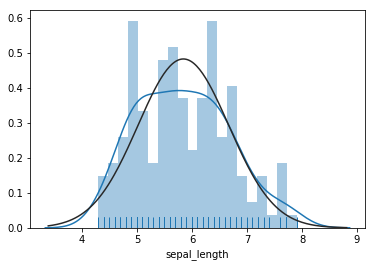

In [28]:
sns.distplot(df["sepal_length"], bins=20, hist=True, kde=True, rug=True, fit=stats.norm);

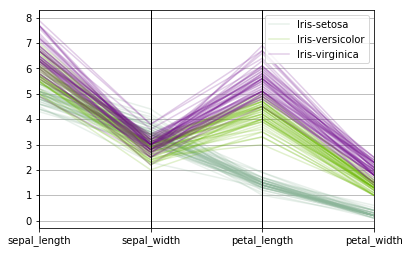

In [29]:
pds.plotting.parallel_coordinates(df,'species', alpha=0.2)

# Miscellaneous

In [30]:
df.loc[:,"sepal_length":"petal_length"].cumsum().tail() # cumulative sum

,sepal_length,sepal_width,petal_length
145,851.6,446.7,543.0
146,857.9,449.2,548.0
147,864.4,452.2,553.2
148,870.6,455.6,558.6
149,876.5,458.6,563.7


In [31]:
df.iloc[:,0:-2].cummin().iloc[-1,:] # cumulative min and retain last only

sepal_length    4.3
sepal_width     2.0
petal_length    1.0
Name: 149, dtype: float64